In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from sklearn import preprocessing as pre
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [85]:
data_medsos = pd.read_csv('survey_medsos.csv')
data_medsos = pd.DataFrame(data_medsos)
data_medsos

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [86]:
data_medsos. isna().sum()

Jenis_Kelamin                               0
Pekerjaan                                   0
Sering                                      0
Lupa_Waktu                                  0
Waktu_Sekali_Pakai                          0
Waktu_Harian                                0
Mengganggu_Produktivitas                    0
Membuang_Waktu                              0
Tidak_Bisa_Kontrol_Diri                     0
Tidak_Sadar_Waktu                           0
Fomo                                        0
Tanpa_Tujuan                                0
Terpikirkan                                 0
Usaha_Melepaskan_Diri                       0
Kesulitan_Melepaskan_Diri                   1
Butuh_Aplikasi                              0
Pernah_Memakai_Aplikasi_Pengaturan_Waktu    0
dtype: int64

In [87]:
data_medsos. isnull()

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [88]:
def_Kesulitan_Melepaskan_Diri = "Ya"
data_medsos.Kesulitan_Melepaskan_Diri .fillna(def_Kesulitan_Melepaskan_Diri , inplace =True)

In [89]:
data_medsos. isna().sum()

Jenis_Kelamin                               0
Pekerjaan                                   0
Sering                                      0
Lupa_Waktu                                  0
Waktu_Sekali_Pakai                          0
Waktu_Harian                                0
Mengganggu_Produktivitas                    0
Membuang_Waktu                              0
Tidak_Bisa_Kontrol_Diri                     0
Tidak_Sadar_Waktu                           0
Fomo                                        0
Tanpa_Tujuan                                0
Terpikirkan                                 0
Usaha_Melepaskan_Diri                       0
Kesulitan_Melepaskan_Diri                   0
Butuh_Aplikasi                              0
Pernah_Memakai_Aplikasi_Pengaturan_Waktu    0
dtype: int64

In [90]:
data_medsos.loc[:,['Jenis_Kelamin','Pekerjaan','Sering','Waktu_Sekali_Pakai','Waktu_Harian', 'Mengganggu_Produktivitas', 'Membuang_Waktu']]

,Jenis_Kelamin,Pekerjaan,Sering,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,31-60 menit,> 2 jam,4,5
1,Laki-laki,Pelajar/Mahasiswa,Instagram,5-10 menit,31-60 menit,3,3
2,Perempuan,Pelajar/Mahasiswa,WA,< 5 menit,> 3 jam,3,4
3,Perempuan,Ibu Rumah Tangga,Instagram,11-30 menit,> 3 jam,4,5
4,Laki-laki,Pelajar/Mahasiswa,WA,31-60 menit,> 2 jam,4,5
...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,11-30 menit,> 1 jam,5,4
114,Laki-laki,Pelajar/Mahasiswa,LINE,> 1 jam,> 3 jam,3,4
115,Laki-laki,Pelajar/Mahasiswa,Instagram,31-60 menit,> 2 jam,5,5
116,Laki-laki,Pelajar/Mahasiswa,Instagram,11-30 menit,> 1 jam,4,4


In [91]:
data_medsos

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [92]:
for index, row in data_medsos.iterrows():
    if row['Mengganggu_Produktivitas'] >4:
        data_medsos.loc[index, 'Keterangan'] = 'Maksimum'
    elif row['Mengganggu_Produktivitas'] >=2:
        data_medsos.loc[index, 'Keterangan'] = 'Rata-Rata'
    else:
        data_medsos.loc[index, 'Keterangan'] = 'Minimum'

data_medsos[['Jenis_Kelamin', 'Pekerjaan', 'Sering', 'Waktu_Sekali_Pakai', 'Waktu_Harian','Mengganggu_Produktivitas', 'Keterangan', 'Membuang_Waktu']]

,Jenis_Kelamin,Pekerjaan,Sering,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Keterangan,Membuang_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,31-60 menit,> 2 jam,4,Rata-Rata,5
1,Laki-laki,Pelajar/Mahasiswa,Instagram,5-10 menit,31-60 menit,3,Rata-Rata,3
2,Perempuan,Pelajar/Mahasiswa,WA,< 5 menit,> 3 jam,3,Rata-Rata,4
3,Perempuan,Ibu Rumah Tangga,Instagram,11-30 menit,> 3 jam,4,Rata-Rata,5
4,Laki-laki,Pelajar/Mahasiswa,WA,31-60 menit,> 2 jam,4,Rata-Rata,5
...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,11-30 menit,> 1 jam,5,Maksimum,4
114,Laki-laki,Pelajar/Mahasiswa,LINE,> 1 jam,> 3 jam,3,Rata-Rata,4
115,Laki-laki,Pelajar/Mahasiswa,Instagram,31-60 menit,> 2 jam,5,Maksimum,5
116,Laki-laki,Pelajar/Mahasiswa,Instagram,11-30 menit,> 1 jam,4,Rata-Rata,4


In [93]:
tabel = data_medsos.reset_index(drop = True)
tabel

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu,Keterangan
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya,Rata-Rata
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak,Rata-Rata
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak,Rata-Rata
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak,Rata-Rata
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak,Rata-Rata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya,Maksimum
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak,Rata-Rata
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya,Maksimum
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak,Rata-Rata


In [94]:
y = targets = labels = tabel['Membuang_Waktu'].apply(float).values
y

array([5., 3., 4., 5., 5., 2., 5., 4., 4., 4., 3., 3., 3., 5., 4., 4., 3.,
       2., 4., 2., 4., 5., 5., 3., 3., 4., 4., 3., 1., 4., 4., 2., 3., 4.,
       4., 4., 3., 4., 4., 3., 5., 4., 5., 3., 2., 2., 4., 2., 4., 3., 2.,
       3., 1., 3., 4., 4., 4., 4., 5., 3., 4., 4., 1., 5., 4., 1., 4., 4.,
       5., 2., 3., 5., 4., 3., 5., 5., 5., 5., 5., 3., 3., 2., 3., 5., 4.,
       2., 4., 4., 4., 4., 3., 3., 4., 4., 3., 4., 1., 4., 3., 4., 1., 3.,
       4., 3., 1., 2., 3., 2., 3., 3., 4., 4., 5., 4., 4., 5., 4., 3.])

In [95]:
columns = ['Mengganggu_Produktivitas']
features = tabel[list(columns)].values
features

array([[4],
       [3],
       [3],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [3],
       [5],
       [3],
       [4],
       [1],
       [3],
       [4],
       [3],
       [3],
       [4],
       [5],
       [5],
       [2],
       [4],
       [4],
       [4],
       [1],
       [4],
       [5],
       [2],
       [2],
       [4],
       [4],
       [2],
       [3],
       [3],
       [3],
       [4],
       [5],
       [4],
       [5],
       [4],
       [2],
       [3],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [5],
       [2],
       [3],
       [4],
       [3],
       [4],
       [4],
       [1],
       [4],
       [3],
       [4],
       [2],
       [4],
       [5],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [3],
       [3],
       [3],
       [3],
       [3],
    

In [96]:
scaler = pre.StandardScaler().fit(features)
X = scaler.transform(features)
X

array([[ 0.55848889],
       [-0.471225  ],
       [-0.471225  ],
       [ 0.55848889],
       [ 0.55848889],
       [-1.50093889],
       [ 0.55848889],
       [ 0.55848889],
       [ 0.55848889],
       [ 0.55848889],
       [ 0.55848889],
       [ 0.55848889],
       [-0.471225  ],
       [ 1.58820278],
       [-0.471225  ],
       [ 0.55848889],
       [-2.53065278],
       [-0.471225  ],
       [ 0.55848889],
       [-0.471225  ],
       [-0.471225  ],
       [ 0.55848889],
       [ 1.58820278],
       [ 1.58820278],
       [-1.50093889],
       [ 0.55848889],
       [ 0.55848889],
       [ 0.55848889],
       [-2.53065278],
       [ 0.55848889],
       [ 1.58820278],
       [-1.50093889],
       [-1.50093889],
       [ 0.55848889],
       [ 0.55848889],
       [-1.50093889],
       [-0.471225  ],
       [-0.471225  ],
       [-0.471225  ],
       [ 0.55848889],
       [ 1.58820278],
       [ 0.55848889],
       [ 1.58820278],
       [ 0.55848889],
       [-1.50093889],
       [-0

In [97]:
SVR_model = SVR(kernel = 'linear', C=100, gamma = .001).fit(X,y)
SVR_model

SVR(C=100, gamma=0.001, kernel='linear')

In [98]:
d_test = tabel.sample(n=16)
d_test

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu,Keterangan
28,Perempuan,Pelajar/Mahasiswa,Instagram,Instagram,> 1 jam,> 3 jam,1,1,2,1,5,2,1,Tidak Tidak Pernah,Tidak,Tidak,Tidak,Minimum
11,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,> 2 jam,4,3,4,3,2,2,2,Pernah,Ya,Ya,Tidak,Rata-Rata
37,Perempuan,Pelajar/Mahasiswa,Twitter,Twitter,> 1 jam,> 3 jam,3,4,3,3,2,3,3,Pernah,Ya,Ya,Ya,Rata-Rata
106,Perempuan,Pelajar/Mahasiswa,Twitter,Twitter,> 1 jam,> 3 jam,4,3,5,4,4,4,4,Pernah,Ya,Tidak,Ya,Rata-Rata
67,Perempuan,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,> 3 jam,3,4,5,5,4,4,4,Pernah,Ya,Ya,Tidak,Rata-Rata
79,Perempuan,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,3,3,4,4,1,3,2,Tidak Tidak Pernah,Tidak,Tidak,Tidak,Rata-Rata
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya,Maksimum
21,Perempuan,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 3 jam,4,5,3,4,3,3,3,Pernah,Ya,Ya,Tidak,Rata-Rata
88,Laki-laki,Pelajar/Mahasiswa,LINE,Instagram,11-30 menit,31-60 menit,4,4,4,4,3,3,3,Pernah,Ya,Tidak,Ya,Rata-Rata
68,Perempuan,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,31-60 menit,4,5,4,4,3,4,2,Pernah,Ya,Tidak,Tidak,Rata-Rata


In [99]:
y_true = d_test['Mengganggu_Produktivitas'].values
y_true

array([1, 4, 3, 4, 3, 3, 5, 4, 4, 4, 5, 3, 4, 4, 2, 3], dtype=int64)

In [100]:
columns = ['Mengganggu_Produktivitas']
features_test = d_test[list(columns)].values
features_test

array([[1],
       [4],
       [3],
       [4],
       [3],
       [3],
       [5],
       [4],
       [4],
       [4],
       [5],
       [3],
       [4],
       [4],
       [2],
       [3]], dtype=int64)

In [101]:
scaler_test = pre.StandardScaler().fit(features_test)
testdata = scaler_test.transform(features_test)
testdata

array([[-2.5],
       [ 0.5],
       [-0.5],
       [ 0.5],
       [-0.5],
       [-0.5],
       [ 1.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 1.5],
       [-0.5],
       [ 0.5],
       [ 0.5],
       [-1.5],
       [-0.5]])

In [102]:
predict = SVR_model.predict(testdata)
predict

array([1.32677225, 3.94888048, 3.0748444 , 3.94888048, 3.0748444 ,
       3.0748444 , 4.82291656, 3.94888048, 3.94888048, 3.94888048,
       4.82291656, 3.0748444 , 3.94888048, 3.94888048, 2.20080833,
       3.0748444 ])

In [103]:
import numpy as np

def mean_absolute_percentage_error(y_true, predict):
    y_true, predict = np.array(y_true), np.array(predict)
    return np.mean(np.abs((y_true - predict)) * 100)

mean_absolute_percentage_error(y_true, predict)

10.086288152428136

In [104]:
from sklearn.metrics import mean_squared_error
y_true_mse = d_test['Membuang_Waktu'].values
y_true_mse

array([1, 3, 4, 3, 4, 3, 5, 5, 4, 5, 5, 3, 4, 4, 2, 4], dtype=int64)

In [105]:
mean_absolute_error(y_true, predict)

0.10086288152428136

In [106]:
CV = CountVectorizer() 
term_fit=CV.fit(tabel) 
print (len(term_fit.vocabulary_)) 

18


In [107]:
print (term_fit.vocabulary_)

{'jenis_kelamin': 2, 'pekerjaan': 8, 'sering': 10, 'lupa_waktu': 5, 'waktu_sekali_pakai': 17, 'waktu_harian': 16, 'mengganggu_produktivitas': 7, 'membuang_waktu': 6, 'tidak_bisa_kontrol_diri': 13, 'tidak_sadar_waktu': 14, 'fomo': 1, 'tanpa_tujuan': 11, 'terpikirkan': 12, 'usaha_melepaskan_diri': 15, 'kesulitan_melepaskan_diri': 3, 'butuh_aplikasi': 0, 'pernah_memakai_aplikasi_pengaturan_waktu': 9, 'keterangan': 4}


In [108]:
term_frekuency = term_fit.transform(data_medsos) 
print (data_medsos)

    Jenis_Kelamin          Pekerjaan     Sering Lupa_Waktu Waktu_Sekali_Pakai  \
0       Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
1       Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram         5-10 menit   
2       Perempuan  Pelajar/Mahasiswa         WA         WA          < 5 menit   
3       Perempuan   Ibu Rumah Tangga  Instagram  Instagram        11-30 menit   
4       Laki-laki  Pelajar/Mahasiswa         WA  Instagram        31-60 menit   
..            ...                ...        ...        ...                ...   
113     Laki-laki  Pelajar/Mahasiswa    Twitter    Twitter        11-30 menit   
114     Laki-laki  Pelajar/Mahasiswa       LINE       LINE            > 1 jam   
115     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
116     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        11-30 menit   
117     Perempuan  Pelajar/Mahasiswa         WA  Instagram        11-30 menit   

    Waktu_Harian  Menggangg

In [109]:
term = term_fit.transform(tabel) 
tfidf_transformer = TfidfTransformer().fit(term)
tfidf = tfidf_transformer.transform(term_frekuency)  
print (tfidf)

  (0, 2)	1.0
  (1, 8)	1.0
  (2, 10)	1.0
  (3, 5)	1.0
  (4, 17)	1.0
  (5, 16)	1.0
  (6, 7)	1.0
  (7, 6)	1.0
  (8, 13)	1.0
  (9, 14)	1.0
  (10, 1)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 15)	1.0
  (14, 3)	1.0
  (15, 0)	1.0
  (16, 9)	1.0
  (17, 4)	1.0


In [110]:
tbl = data_medsos.reset_index(drop=True)
tbl

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu,Keterangan
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya,Rata-Rata
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak,Rata-Rata
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak,Rata-Rata
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak,Rata-Rata
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak,Rata-Rata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya,Maksimum
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak,Rata-Rata
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya,Maksimum
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak,Rata-Rata


In [112]:
x = tbl[['Membuang_Waktu', 'Mengganggu_Produktivitas']].values
print(x)

[[5 4]
 [3 3]
 [4 3]
 [5 4]
 [5 4]
 [2 2]
 [5 4]
 [4 4]
 [4 4]
 [4 4]
 [3 4]
 [3 4]
 [3 3]
 [5 5]
 [4 3]
 [4 4]
 [3 1]
 [2 3]
 [4 4]
 [2 3]
 [4 3]
 [5 4]
 [5 5]
 [3 5]
 [3 2]
 [4 4]
 [4 4]
 [3 4]
 [1 1]
 [4 4]
 [4 5]
 [2 2]
 [3 2]
 [4 4]
 [4 4]
 [4 2]
 [3 3]
 [4 3]
 [4 3]
 [3 4]
 [5 5]
 [4 4]
 [5 5]
 [3 4]
 [2 2]
 [2 3]
 [4 3]
 [2 3]
 [4 4]
 [3 3]
 [2 3]
 [3 3]
 [1 4]
 [3 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [5 5]
 [3 2]
 [4 3]
 [4 4]
 [1 3]
 [5 4]
 [4 4]
 [1 1]
 [4 4]
 [4 3]
 [5 4]
 [2 2]
 [3 4]
 [5 5]
 [4 4]
 [3 3]
 [5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 3]
 [3 3]
 [3 3]
 [2 3]
 [3 3]
 [5 1]
 [4 4]
 [2 2]
 [4 3]
 [4 3]
 [4 4]
 [4 3]
 [3 4]
 [3 3]
 [4 4]
 [4 3]
 [3 3]
 [4 3]
 [1 4]
 [4 4]
 [3 3]
 [4 4]
 [1 1]
 [3 3]
 [4 3]
 [3 3]
 [1 2]
 [2 3]
 [3 4]
 [2 2]
 [3 3]
 [3 4]
 [4 4]
 [4 4]
 [5 5]
 [4 5]
 [4 3]
 [5 5]
 [4 4]
 [3 4]]


C:\Users\ASUS\anaconda3\annac\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\annac\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


coordinate 0  [5 4] labels 0
coordinate 1  [3 3] labels 2
coordinate 2  [4 3] labels 2
coordinate 3  [5 4] labels 0
coordinate 4  [5 4] labels 0
coordinate 5  [2 2] labels 1
coordinate 6  [5 4] labels 0
coordinate 7  [4 4] labels 0
coordinate 8  [4 4] labels 0
coordinate 9  [4 4] labels 0
coordinate 10  [3 4] labels 2
coordinate 11  [3 4] labels 2
coordinate 12  [3 3] labels 2
coordinate 13  [5 5] labels 0
coordinate 14  [4 3] labels 2
coordinate 15  [4 4] labels 0
coordinate 16  [3 1] labels 1
coordinate 17  [2 3] labels 1
coordinate 18  [4 4] labels 0
coordinate 19  [2 3] labels 1
coordinate 20  [4 3] labels 2
coordinate 21  [5 4] labels 0
coordinate 22  [5 5] labels 0
coordinate 23  [3 5] labels 0
coordinate 24  [3 2] labels 2
coordinate 25  [4 4] labels 0
coordinate 26  [4 4] labels 0
coordinate 27  [3 4] labels 2
coordinate 28  [1 1] labels 1
coordinate 29  [4 4] labels 0
coordinate 30  [4 5] labels 0
coordinate 31  [2 2] labels 1
coordinate 32  [3 2] labels 2
coordinate 33  [4 4]

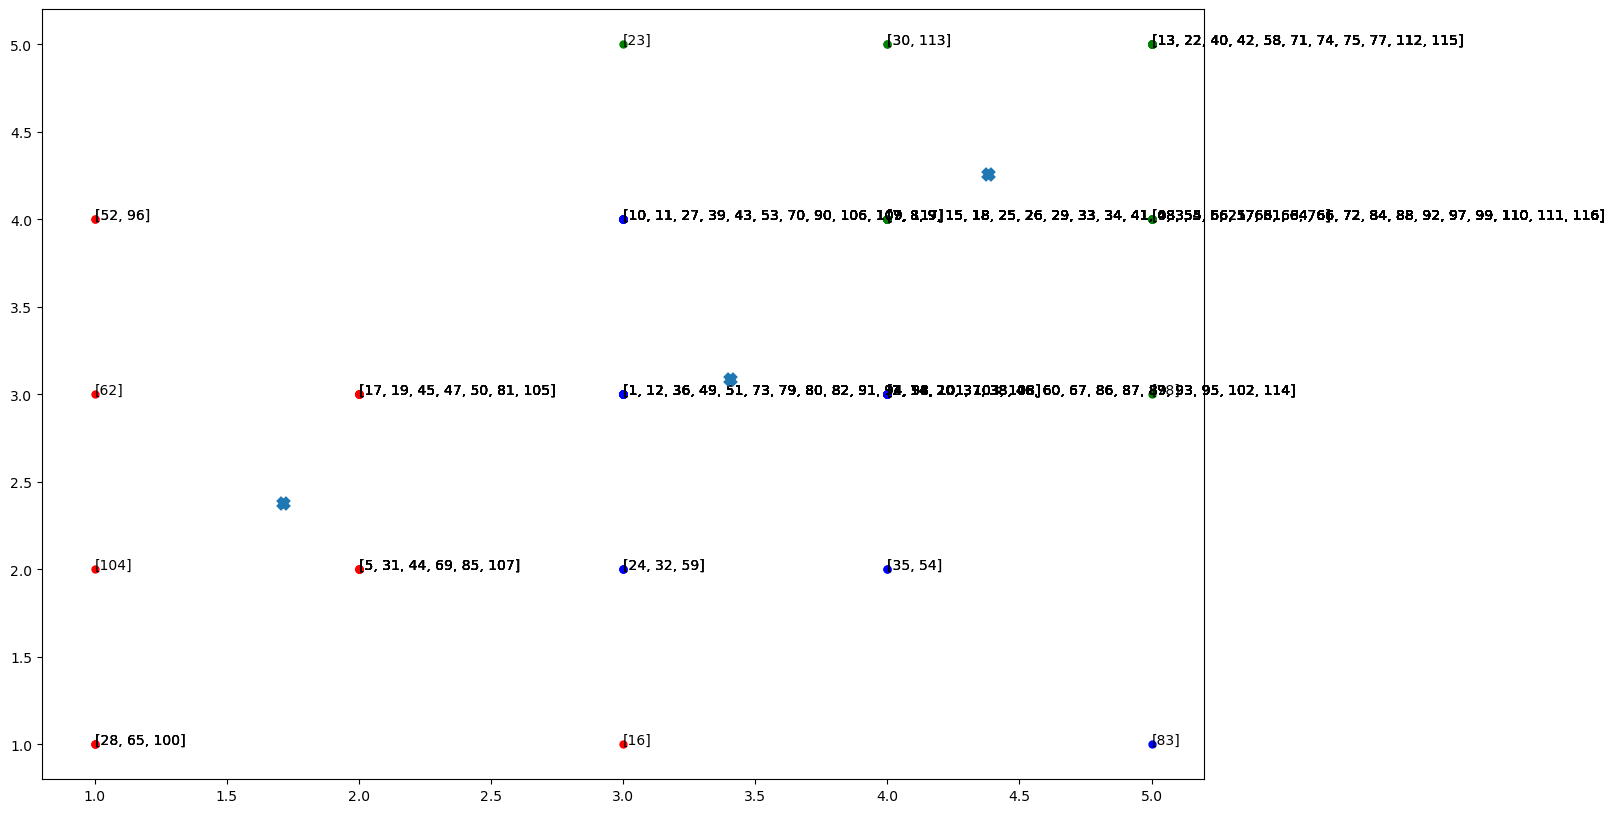

In [113]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['g.', 'r.', 'b.']

plt.figure(figsize = (15,10))

for i in range(len(x)):
    print ('coordinate %s '%i, x[i], 'labels %s' %labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize=10)
    list_cluster = tbl[(tbl['Membuang_Waktu'] == x[i][0]) & (tbl['Mengganggu_Produktivitas'] == x[i][1])].index.tolist()
    plt.text(x[i][0], x[i][1], '%s' %(list_cluster))
plt.scatter(centroids[: , 0], centroids[: , 1], marker = 'x', s = 50, linewidths = 5, zorder = 10)
plt.show()